**`CIC1A-6`**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Age Distribution Analysis**

**`CIC1A-7`**

In [20]:
age_df = pd.read_csv(r"C:\Users\Adnan\Desktop\Codes\Cyber Square DS\covid-19-india-analysis-by-me\data\raw\agedistribution_2016_estimates.csv")
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     21 non-null     object 
 1   M       21 non-null     float64
 2   F       21 non-null     float64
 3   Tot     21 non-null     float64
dtypes: float64(3), object(1)
memory usage: 804.0+ bytes


In [21]:
age_df.sample(5)

,Age,M,F,Tot
7,35-39,7.0,7.2,7.1
10,50-54,4.4,4.3,4.3
1,9-May,9.1,8.8,8.9
3,15-19,10.4,9.9,10.1
5,25-29,9.5,9.8,9.7


**`CIC1A-8`**

In [22]:
age_df.describe(include="all")

,Age,M,F,Tot
count,21,21.000000,21.000000,21.000000
unique,21,NaN,NaN,NaN
top,0-4,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,9.523810,9.523810,9.542857
std,NaN,14.529243,14.571236,14.527752
min,NaN,0.200000,0.300000,0.300000
25%,NaN,3.000000,3.100000,3.100000
50%,NaN,6.100000,6.100000,6.100000
75%,NaN,9.500000,9.400000,9.600000


In [23]:
# null values
age_df.isna().sum()

Age    0
M      0
F      0
Tot    0
dtype: int64

In [24]:
age_df.dtypes

Age     object
M      float64
F      float64
Tot    float64
dtype: object

**`CIC1A-9`**

In [25]:
age_df.head(2)

,Age,M,F,Tot
0,0-4,8.7,8.2,8.5
1,9-May,9.1,8.8,8.9


In [26]:
# rename column names to more readable

age_df = age_df.rename(columns={
    "Age" : "age_distribution",
    "M" : "male",
    "F" : "female",
    "Tot" : "total"
})

age_df.head()

,age_distribution,male,female,total
0,0-4,8.7,8.2,8.5
1,9-May,9.1,8.8,8.9
2,14-Oct,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4


**`CIC1A-10`**

In [27]:
age_df["age_distribution"].unique()

array(['0-4', '9-May', '14-Oct', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85+', '0-14', '15-64', '65+'],
      dtype=object)

In [28]:
# map the 'May' into 5 and 'Oct' into 10

age_df["age_distribution"] = age_df["age_distribution"].replace({
    "May" : "5",
    "Oct" : "10"
}, regex=True
)

age_df["age_distribution"].unique()

array(['0-4', '9-5', '14-10', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85+', '0-14', '15-64', '65+'], dtype=object)

**`CIC1A-11`**

In [ ]:
age_df  

,age_distribution,male,female,total
0,0-4,8.7,8.2,8.5
1,9-5,9.1,8.8,8.9
2,14-10,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4
5,25-29,9.5,9.8,9.7
6,30-34,8.1,8.0,8.1
7,35-39,7.0,7.2,7.1
8,40-44,6.1,6.1,6.1
9,45-49,5.3,5.4,5.3


- as you can see, the last 3 rows are duplicate info. Its just 3 split of the age group, we don't want that

In [104]:
age_df = age_df.iloc[:18]
age_df

,age_distribution,male,female,total
0,0-4,8.7,8.2,8.5
1,9-5,9.1,8.8,8.9
2,14-10,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4
5,25-29,9.5,9.8,9.7
6,30-34,8.1,8.0,8.1
7,35-39,7.0,7.2,7.1
8,40-44,6.1,6.1,6.1
9,45-49,5.3,5.4,5.3


**`CIC1A-12`**

In [105]:
age_df.head()

,age_distribution,male,female,total
0,0-4,8.7,8.2,8.5
1,9-5,9.1,8.8,8.9
2,14-10,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4


- Age Distribution with Gender

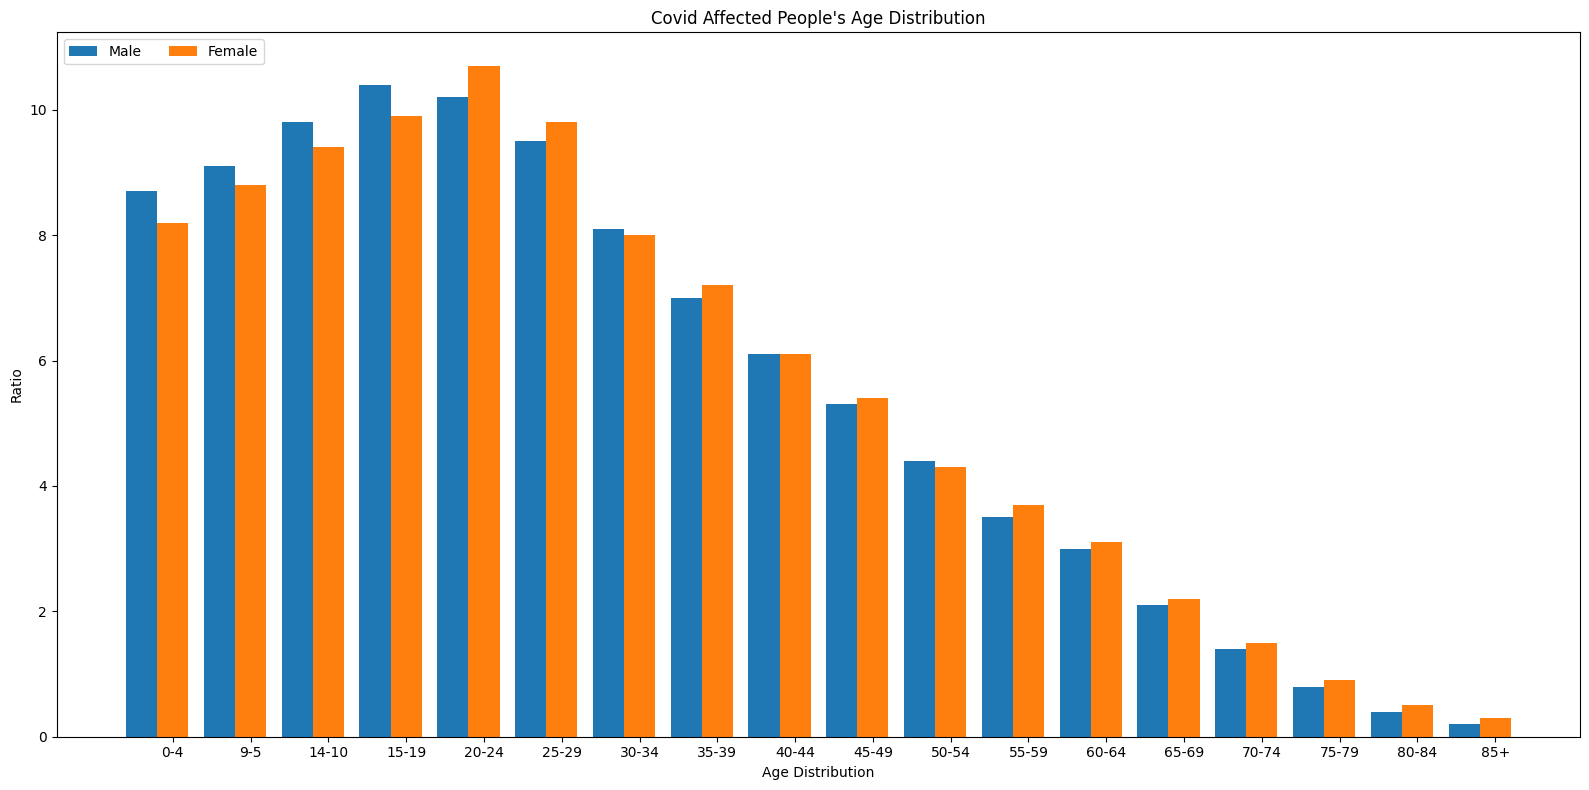

In [106]:
x = np.arange(len(age_df))
width = 0.40

fig, ax = plt.subplots(figsize=(16, 8))

male_bar = ax.bar(x - width, age_df["male"],width, label="Male")
female_bar = ax.bar(x, age_df["female"],width, label="Female")

ax.set_title("Covid Affected People's Age Distribution")
ax.set_xlabel("Age Distribution")
ax.set_ylabel("Ratio")
ax.set_xticks(x)
ax.set_xticklabels(age_df["age_distribution"])

ax.legend(loc="upper left", ncols=2)

plt.tight_layout()
plt.show()